<a href="https://colab.research.google.com/github/mehrdat/Pytorch_VideoGame_Classification/blob/main/Pytorch_videoGames_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [186]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler,MinMaxScaler

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms



In [187]:
data=pd.read_csv('./vgs.csv')
data=data.drop(columns=['Rank','NA_Sales','Other_Sales','Name'])
#data=data.set_index('Name')

obj_column=data.select_dtypes(include=['object']).columns
for col in obj_column:
    data=pd.concat([data,pd.get_dummies(data[col],prefix=col)],axis=1)
    data=data.drop(columns=[col],axis=1)
data.head()
#data.describe()

,Year,EU_Sales,JP_Sales,Global_Sales,Platform_2600,Platform_3DO,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,...,Publisher_Zushi Games,Publisher_bitComposer Games,Publisher_dramatic create,Publisher_fonfun,Publisher_iWin,Publisher_id Software,Publisher_imageepoch Inc.,Publisher_inXile Entertainment,"Publisher_mixi, Inc",Publisher_responDESIGN
0,2006.0,29.02,3.77,82.74,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1985.0,3.58,6.81,40.24,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2008.0,12.88,3.79,35.82,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2009.0,11.01,3.28,33.00,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1996.0,8.89,10.22,31.37,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [188]:
data.dropna(inplace=True)
data.isna().sum()

Year                              0
EU_Sales                          0
JP_Sales                          0
Global_Sales                      0
Platform_2600                     0
                                 ..
Publisher_id Software             0
Publisher_imageepoch Inc.         0
Publisher_inXile Entertainment    0
Publisher_mixi, Inc               0
Publisher_responDESIGN            0
Length: 625, dtype: int64

In [189]:
len(data.select_dtypes(include=['bool']).columns)

621

In [190]:

#Moving the target column to the last column

cols=list(data.columns)
cols.append(cols.pop(cols.index('Global_Sales')))
data=data[cols]
data.head()

,Year,EU_Sales,JP_Sales,Platform_2600,Platform_3DO,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,Platform_GBA,...,Publisher_bitComposer Games,Publisher_dramatic create,Publisher_fonfun,Publisher_iWin,Publisher_id Software,Publisher_imageepoch Inc.,Publisher_inXile Entertainment,"Publisher_mixi, Inc",Publisher_responDESIGN,Global_Sales
0,2006.0,29.02,3.77,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,82.74
1,1985.0,3.58,6.81,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,40.24
2,2008.0,12.88,3.79,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,35.82
3,2009.0,11.01,3.28,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,33.00
4,1996.0,8.89,10.22,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,31.37


In [191]:
# min=MinMaxScaler()
# minmaxed=min.fit_transform(data)
# index=data.index
# data=pd.DataFrame(minmaxed,columns=data.columns)


data.head()


,Year,EU_Sales,JP_Sales,Platform_2600,Platform_3DO,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,Platform_GBA,...,Publisher_bitComposer Games,Publisher_dramatic create,Publisher_fonfun,Publisher_iWin,Publisher_id Software,Publisher_imageepoch Inc.,Publisher_inXile Entertainment,"Publisher_mixi, Inc",Publisher_responDESIGN,Global_Sales
0,2006.0,29.02,3.77,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,82.74
1,1985.0,3.58,6.81,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,40.24
2,2008.0,12.88,3.79,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,35.82
3,2009.0,11.01,3.28,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,33.00
4,1996.0,8.89,10.22,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,31.37


In [192]:

class GameDataset(Dataset):
  def __init__(self,data,transform=None):
    self.data=data
    self.transform=transform

  def __len__(self):
    return len(self.data)

  def __getitem__(self,idx):
    feature=self.data.iloc[idx,:-1].values.reshape(1,-1)
    target=self.data.iloc[idx,-1]
    if self.transform:
      feature=self.transform(feature)
    return torch.tensor(feature,dtype=torch.float32).squeeze(),torch.tensor(target,dtype=torch.float32)




In [193]:
import torchvision.transforms as transforms
import torch


print(type(data))
#data = torch.tensor(data.values)
print(type(data))

non_numeric_cols = data.select_dtypes(exclude=[np.number]).columns

# Convert non-numeric columns to numeric (you might need to adjust the strategy based on your data)
for col in non_numeric_cols:
    data[col] = pd.factorize(data[col])[0]  # Example: convert to numerical categories

data_tensor = torch.tensor(data.values, dtype=torch.float32)  # Convert entire DataFrame to tensor
mean = torch.mean(data_tensor, dim=0)
std = torch.std(data_tensor, dim=0)


transform = transforms.Compose([
       transforms.ToTensor(),
       transforms.Normalize(mean, std)])

dataset = GameDataset(data, transform=transforms.ToTensor())
train_size=int(0.8*len(dataset))
test_size= len(dataset)-train_size


train_data,test_data=torch.utils.data.random_split(dataset,[train_size,test_size])


train_dataloader = DataLoader( train_data ,   batch_size=128)
test_dataloader  = DataLoader( test_data,   batch_size=128)




<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [194]:
class VideoGame(nn.Module):
    def __init__(self,input_size,output_size):
        super(VideoGame,self).__init__()
        self.linear1=nn.Linear(input_size,256)
        self.batchnorm1=nn.BatchNorm1d(256)
        self.linear2=nn.Linear(256,128)
        self.batchnorm2=nn.BatchNorm1d(128)
        self.dropout = nn.Dropout(0.2)
        self.linear3=nn.Linear(128,64)
        self.batchnorm3=nn.BatchNorm1d(64)
        self.linear4=nn.Linear(64,16)
        self.batchnorm4=nn.BatchNorm1d(16)
        self.linear5=nn.Linear(16,1)

    def forward(self,x):
      x=F.relu(self.batchnorm1(self.linear1(x)))
      x=self.dropout(F.relu(self.batchnorm2(self.linear2(x))))
      x=F.relu(self.batchnorm3(self.linear3(x)))
      x=F.relu(self.batchnorm4(self.linear4(x)))
      x=self.linear5(x)
      return x


input_dim=data.shape[1]-1
output_dim=1
model=VideoGame(input_dim,output_dim)

In [195]:
optimizer=optim.Adam(model.parameters(),lr=0.001,weight_decay=1e-5)
criterion=nn.MSELoss()

In [196]:
losses=[]
epochs=100
model.train()
for epoch in range(epochs):

  for data,target in train_dataloader:
    optimizer.zero_grad()
    output=model(data)
    loss=criterion(output,target)
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
  if epoch%10==0:
    print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}')

<ipython-input-192-1470015c0f0b>:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(feature,dtype=torch.float32).squeeze(),torch.tensor(target,dtype=torch.float32)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([5])) that is different to the input size (torch.Size([5, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, r

Epoch 1/100, Loss: 1.6511
Epoch 11/100, Loss: 1.2738
Epoch 21/100, Loss: 1.3084
Epoch 31/100, Loss: 1.2401
Epoch 41/100, Loss: 1.2428
Epoch 51/100, Loss: 1.2386
Epoch 61/100, Loss: 1.2381
Epoch 71/100, Loss: 1.2401
Epoch 81/100, Loss: 1.2403
Epoch 91/100, Loss: 1.2497


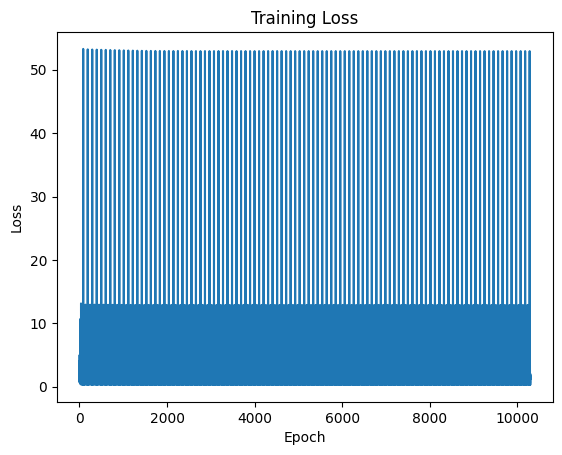

In [197]:

plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

<ipython-input-192-1470015c0f0b>:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(feature,dtype=torch.float32).squeeze(),torch.tensor(target,dtype=torch.float32)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([66])) that is different to the input size (torch.Size([66, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Test Loss: 2.2121


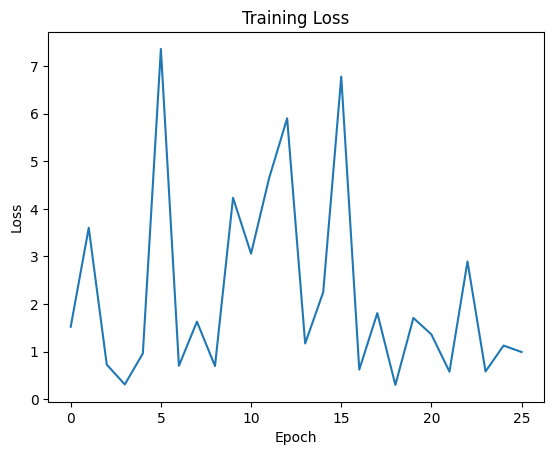

In [198]:

model.eval()

with torch.no_grad():
  test_losses=[]
  for data,target in test_dataloader:
    output=model(data)
    loss=criterion(output,target)
    test_losses.append(loss.item())

  print(f'Test Loss: {np.mean(test_losses):.4f}')


plt.plot(test_losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

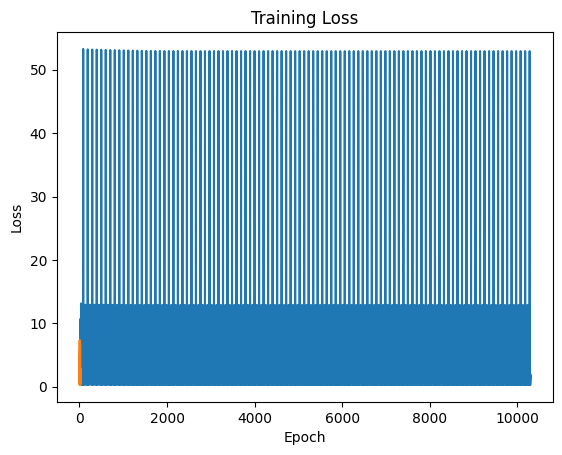

In [199]:
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.plot(test_losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()



In [202]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.6 MB/s eta 0:00:00


In [207]:
import optuna


class VideoGame(nn.Module):
    def __init__(self,input_size,output_size,hid1,hid2,hid3,hid4):
        super(VideoGame,self).__init__()
        self.linear1=nn.Linear(input_size,hid1)
        self.batchnorm1=nn.BatchNorm1d(hid1)

        self.linear2=nn.Linear(hid1,hid2)
        self.batchnorm2=nn.BatchNorm1d(hid2)

        self.linear3=nn.Linear(hid2,hid3)
        self.batchnorm3=nn.BatchNorm1d(hid3)

        self.linear4=nn.Linear(hid3,hid4)
        self.dropout = nn.Dropout(0.2)
        self.batchnorm4=nn.BatchNorm1d(hid4)

        self.linear5=nn.Linear(hid4,1)

    def forward(self,x):
      x=F.relu(self.batchnorm1(self.linear1(x)))
      x=F.relu(self.batchnorm2(self.linear2(x)))
      x=F.relu(self.batchnorm3(self.linear3(x)))

      x=self.dropout(x)
      x=F.relu(self.batchnorm4(self.linear4(x)))
      x=self.linear5(x)
      return x


def objective(trial):

  global data
  input_dim=data.shape[1]
  output_dim=1

  hid1 = trial.suggest_int('hidden_dim1', 64, 256)
  hid2 = trial.suggest_int('hidden_dim2', 16, 128)
  hid3 = trial.suggest_int('hidden_dim3', 64, 256)
  hid4 = trial.suggest_int('hidden_dim4', 16, 128)

  lr = trial.suggest_loguniform('lr', 1e-5, 1e-1)
  batch_size = trial.suggest_int('batch_size', 16, 128, log=True)
  model=VideoGame(input_dim,output_dim,hid1,hid2,hid3,hid4)


  train_dataloader = DataLoader( train_data ,   batch_size=batch_size)
  test_dataloader  = DataLoader( test_data,   batch_size=batch_size)
  optimizer=optim.Adam(model.parameters(),lr=lr)
  criterion=nn.MSELoss()

  losses=[]
  epochs=20
  model.train()
  for epoch in range(epochs):

    for data,target in train_dataloader:
      optimizer.zero_grad()
      output=model(data)
      loss=criterion(output,target)
      loss.backward()
      optimizer.step()

      losses.append(loss.item())
    if epoch%10==0:
      print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}')

  model.eval()

  with torch.no_grad():
    test_losses=[]
    for data,target in test_dataloader:
      output=model(data)
      loss=criterion(output,target)
      test_losses.append(loss.item())

    print(f'Test Loss: {np.mean(test_losses):.4f}')
  return np.mean(test_losses)

study=optuna.create_study(direction='minimize')
study.optimize(objective,n_trials=5)

print('Number of finished trials:', len(study.trials))
print('Best trial:',study.best_trial.params)




[I 2024-07-12 00:51:09,085] A new study created in memory with name: no-name-1cc9fa52-8d1f-450a-8378-711ba8db20c5
<ipython-input-207-b65edb585ad0>:44: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('lr', 1e-5, 1e-1)
<ipython-input-192-1470015c0f0b>:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(feature,dtype=torch.float32).squeeze(),torch.tensor(target,dtype=torch.float32)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([24])) that is different to the input size (torch.Size([24, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure 

Epoch 1/20, Loss: 1.3499
Epoch 11/20, Loss: 1.3503


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([2, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
[I 2024-07-12 00:59:20,342] Trial 0 finished with value: 2.2171484551691605 and parameters: {'hidden_dim1': 110, 'hidden_dim2': 102, 'hidden_dim3': 123, 'hidden_dim4': 60, 'lr': 0.07515648292066017, 'batch_size': 24}. Best is trial 0 with value: 2.2171484551691605.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([28])) that is different to the input size (torch.Size([28, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Test Loss: 2.2171


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([13])) that is different to the input size (torch.Size([13, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1/20, Loss: 0.8420
Epoch 11/20, Loss: 0.6116


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([18])) that is different to the input size (torch.Size([18, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
[I 2024-07-12 01:07:05,733] Trial 1 finished with value: 2.235697550651355 and parameters: {'hidden_dim1': 111, 'hidden_dim2': 120, 'hidden_dim3': 115, 'hidden_dim4': 120, 'lr': 1.761443155760351e-05, 'batch_size': 28}. Best is trial 0 with value: 2.2171484551691605.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([48])) that is different to the input size (torch.Size([48, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Test Loss: 2.2357
Epoch 1/20, Loss: 1.3022
Epoch 11/20, Loss: 1.2967


[I 2024-07-12 01:14:30,930] Trial 2 finished with value: 3.783985852331355 and parameters: {'hidden_dim1': 220, 'hidden_dim2': 106, 'hidden_dim3': 73, 'hidden_dim4': 42, 'lr': 0.002031234068298699, 'batch_size': 48}. Best is trial 0 with value: 2.2171484551691605.


Test Loss: 3.7840
Epoch 1/20, Loss: 1.4893
Epoch 11/20, Loss: 1.2871


[I 2024-07-12 01:22:28,225] Trial 3 finished with value: 2.220871717791433 and parameters: {'hidden_dim1': 65, 'hidden_dim2': 116, 'hidden_dim3': 210, 'hidden_dim4': 105, 'lr': 2.1790025756717227e-05, 'batch_size': 24}. Best is trial 0 with value: 2.2171484551691605.


Test Loss: 2.2209


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([38])) that is different to the input size (torch.Size([38, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([27])) that is different to the input size (torch.Size([27, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1/20, Loss: 0.4008
Epoch 11/20, Loss: 0.4014


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([36])) that is different to the input size (torch.Size([36, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
[I 2024-07-12 01:30:04,085] Trial 4 finished with value: 2.2532104614169097 and parameters: {'hidden_dim1': 127, 'hidden_dim2': 61, 'hidden_dim3': 198, 'hidden_dim4': 69, 'lr': 0.004916791947225127, 'batch_size': 38}. Best is trial 0 with value: 2.2171484551691605.


Test Loss: 2.2532
Number of finished trials: 5
Best trial: {'hidden_dim1': 110, 'hidden_dim2': 102, 'hidden_dim3': 123, 'hidden_dim4': 60, 'lr': 0.07515648292066017, 'batch_size': 24}


Best trial: {'hidden_dim1': 110, 'hidden_dim2': 102, 'hidden_dim3': 123, 'hidden_dim4': 60, 'lr': 0.07515648292066017, 'batch_size': 24}

